In [5]:
from p_drought_indices.functions.function_clns import load_config, print_raster
import os


CONFIG_PATH= "../config.yaml"
config = load_config(CONFIG_PATH)
import xarray as xr

for product_dir in [config['SPI']['IMERG']['path'], config['SPI']['GPCC']['path'], config['SPI']['CHIRPS']['path'], config['SPI']['ERA5']['path']]:
    file = [file for file in os.listdir(product_dir) if "spi_gamma_180" in file ][0]
    print(f"The file is {file[:-3]}")
    ds = xr.open_dataset(os.path.join(product_dir, file))
    print_raster(ds)

The file is IMERG_spi_gamma_180
shape: (97, 91)
resolution: (0.2, 0.20000000794728598)
bounds: (33.00000228881836, 14.800001720587412, 51.20000228881836, -4.599999050299327)
CRS: None

The file is GPCC_spi_gamma_180
shape: (18, 17)
resolution: (1.0, 1.0)
bounds: (34.0, 14.0, 51.0, -4.0)
CRS: None

The file is CHIRPS_spi_gamma_180
shape: (78, 74)
resolution: (0.25, 0.25)
bounds: (33.0, 14.75, 51.5, -4.75)
CRS: None

The file is ERA5_spi_gamma_180
shape: (78, 73)
resolution: (0.25, -0.25)
bounds: (33.125, -4.625, 51.375, 14.875)
CRS: None



In [2]:
import pandas as pd
data = pd.read_csv(r'../data/spi_vci/spi_vci_daily.csv').iloc[:, 1:]

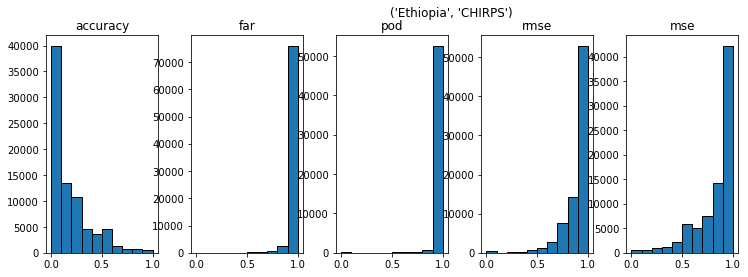

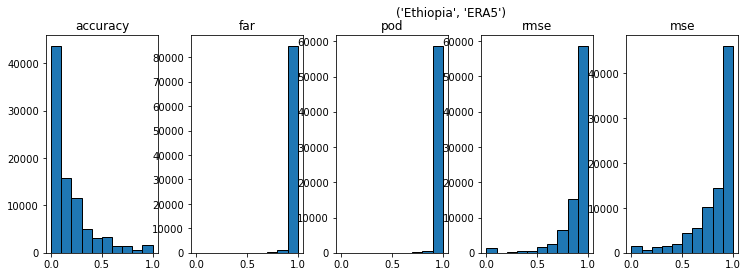

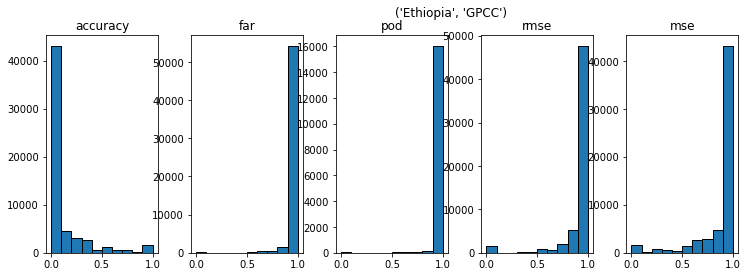

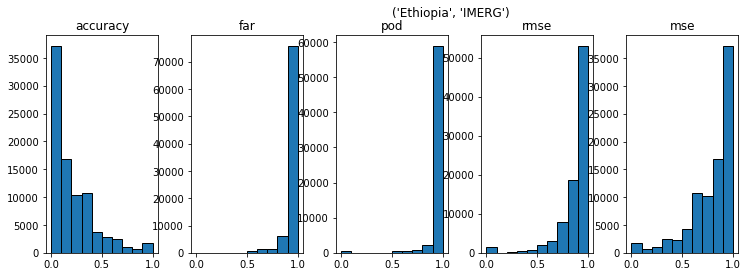

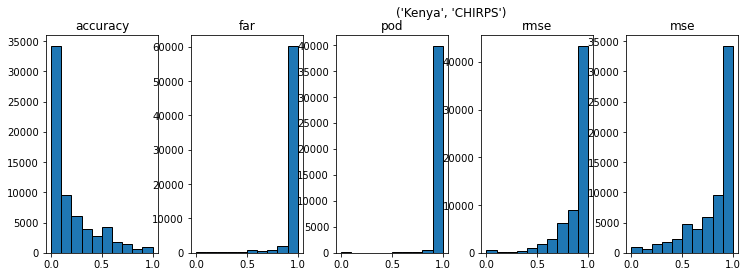

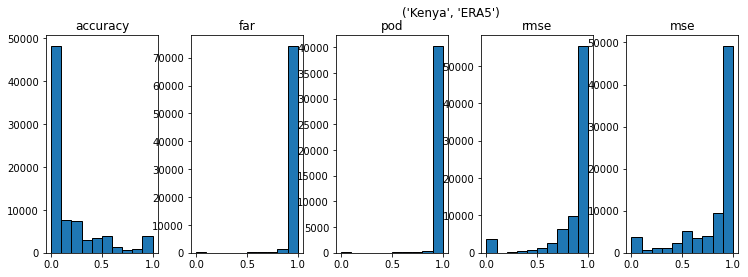

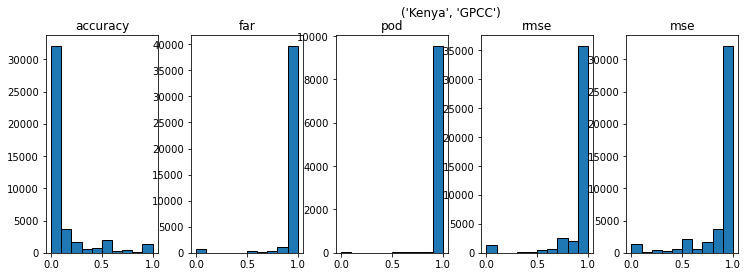

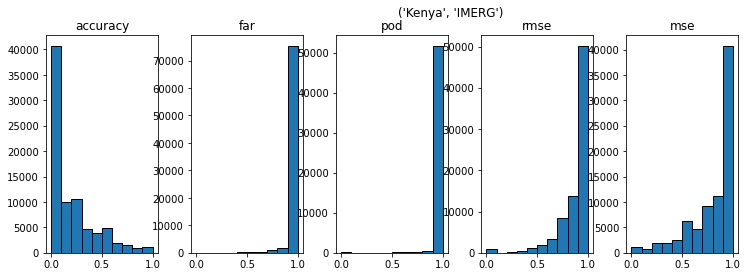

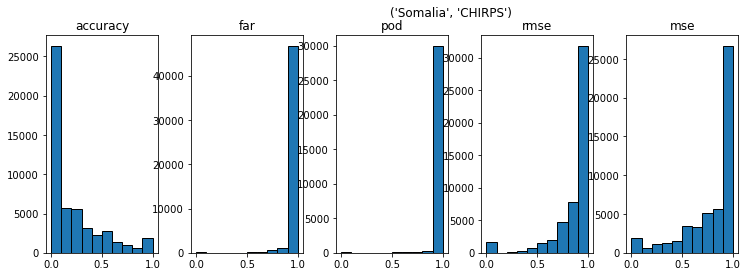

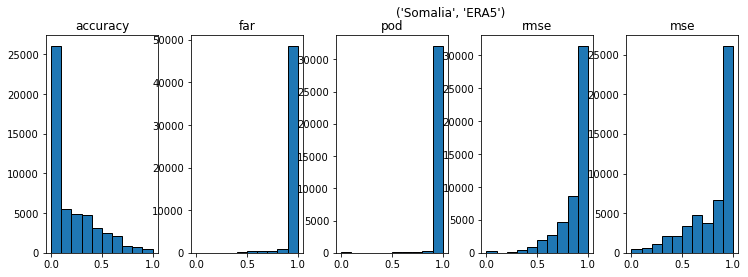

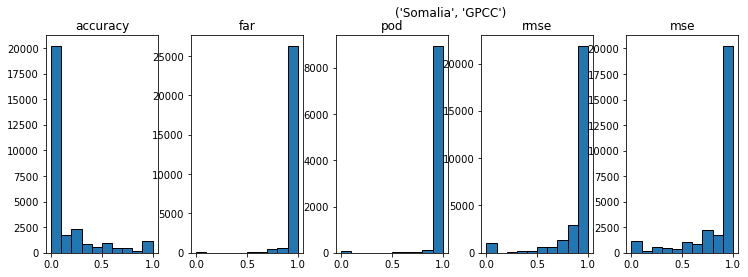

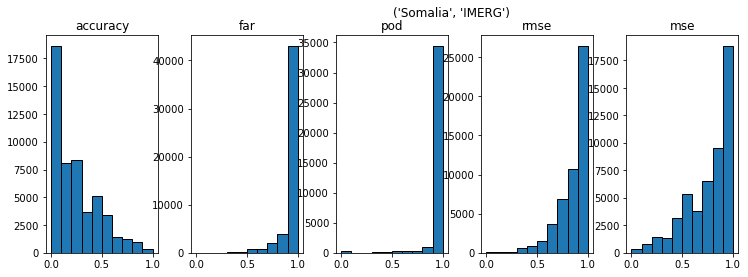

In [2]:
for idx, df in data.drop(columns={'precp_idx','land_cat','time'}).groupby(['country','product']):
        # plot a hist for each column
    axes = df.hist(layout=(1, 6), figsize=(15, 4), ec='k', grid=False)

    #df.plot(layout=(1, 6), kind='kde', ax=axes, secondary_y=True)

    # extract the figure object from the array of axes
    fig = axes[0][0].get_figure()

    # add the gender as the title
    fig.suptitle(idx)

### Plots for SPI latency

In [3]:
df = data.groupby(['country','product']).mean()[['far','pod','accuracy','mse']]
df.style.background_gradient(cmap='Blues')

<Figure size 432x288 with 0 Axes>

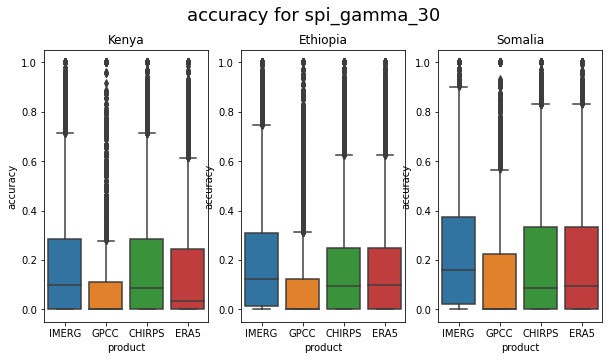

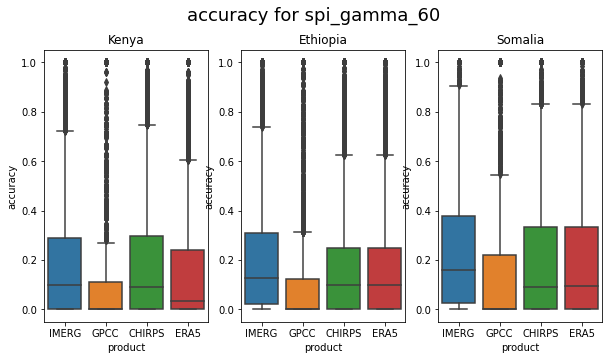

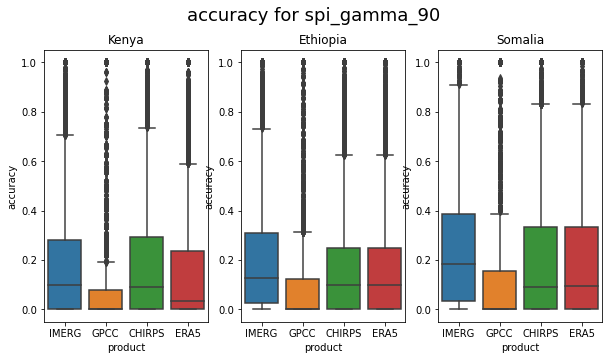

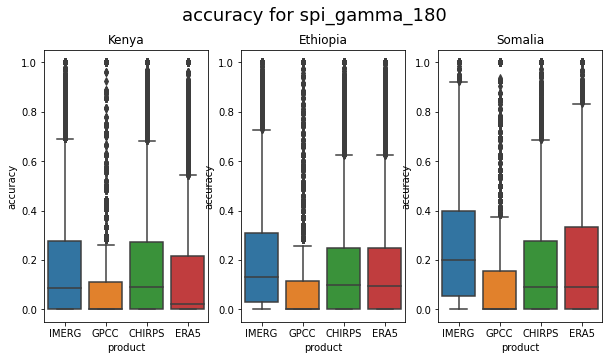

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots_adjust(wspace=0.8)
plt.subplots_adjust(hspace=0.5)


countries = ['Kenya','Ethiopia','Somalia']
for i, precp in enumerate(data["precp_idx"].unique()):
    for metric in ['accuracy']:
        fig, axes = plt.subplots(1, 3, figsize=(10,5))
        for country, ax in zip(countries, axes.ravel()):
            plt.suptitle(f"{metric} for {precp}", fontsize=18, y=1)
            new_df = data.loc[(data["country"]==country) & (data["precp_idx"]==precp)].dropna(subset=[metric])
            if len(new_df)>0:
                sns.boxplot(data = new_df, y=metric, x='product', ax=ax)
            ax.set_title(f"{country}")
        plt.show()

In [136]:
sub_df = data.loc[data['precp_idx']=="spi_gamma_180"]
df = sub_df.groupby(['description','country','product']).mean()[['far','pod','accuracy']]
df.style.background_gradient(cmap='Blues')


### Plots for type of terrain

<Figure size 432x288 with 0 Axes>

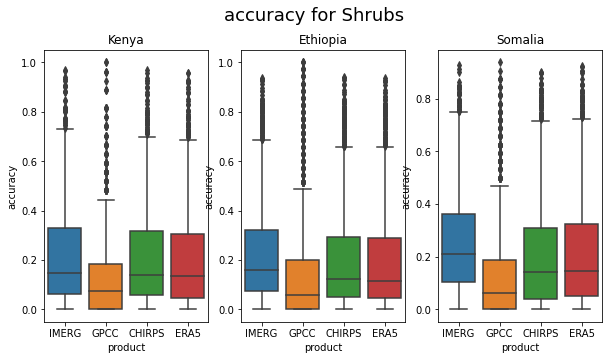

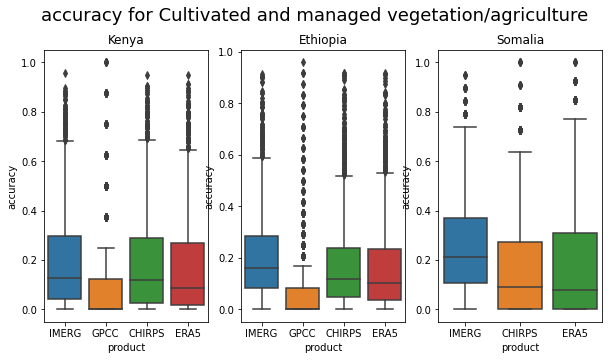

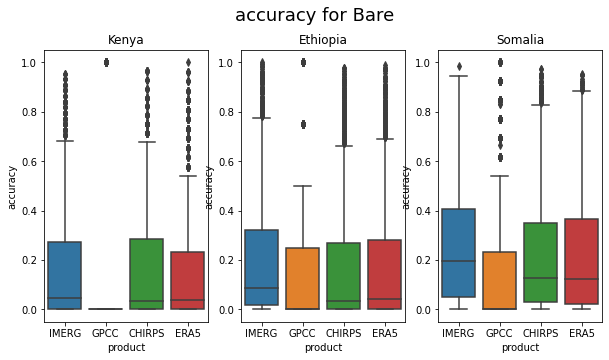

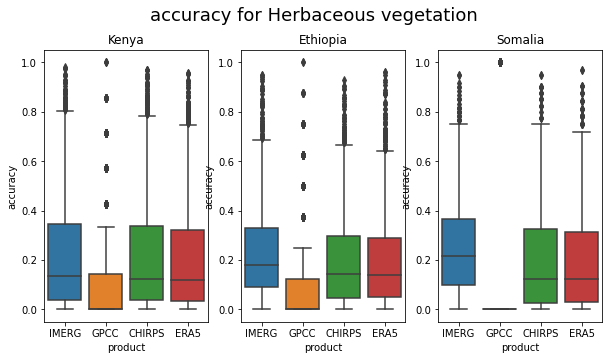

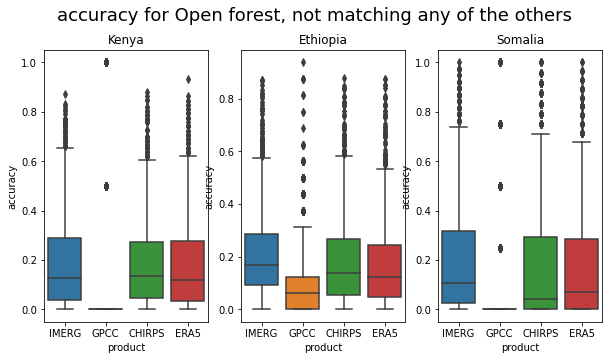

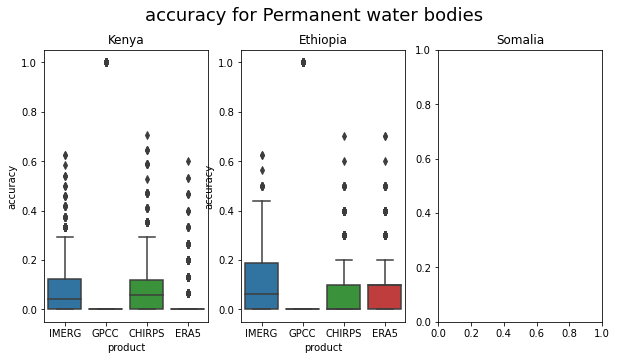

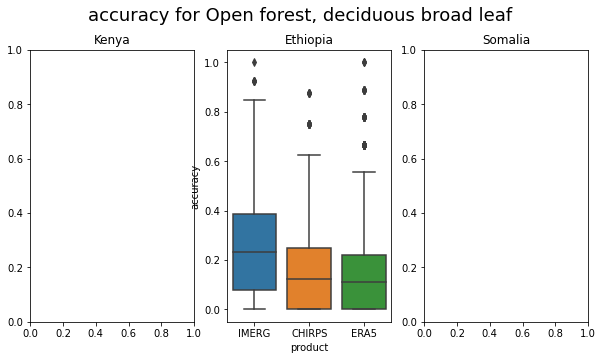

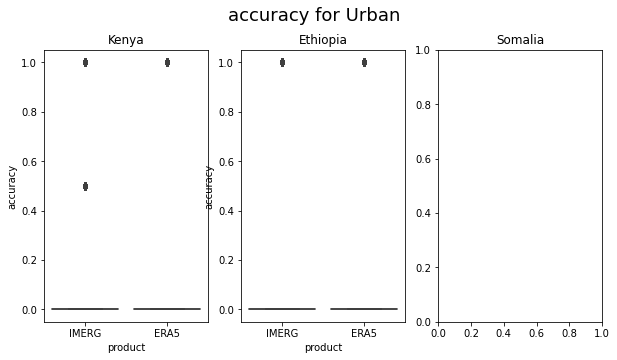

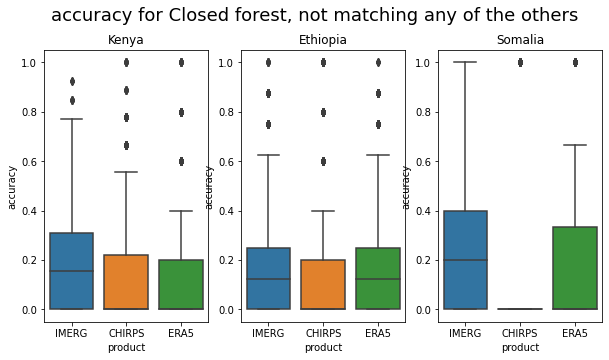

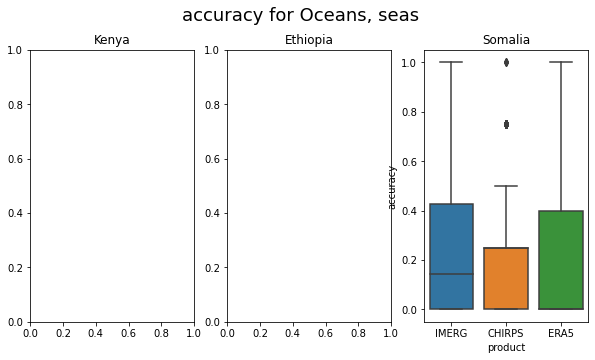

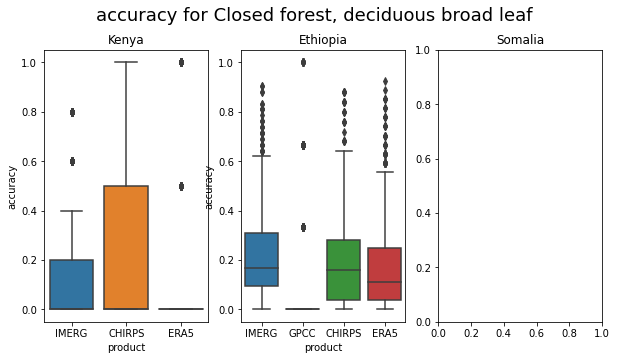

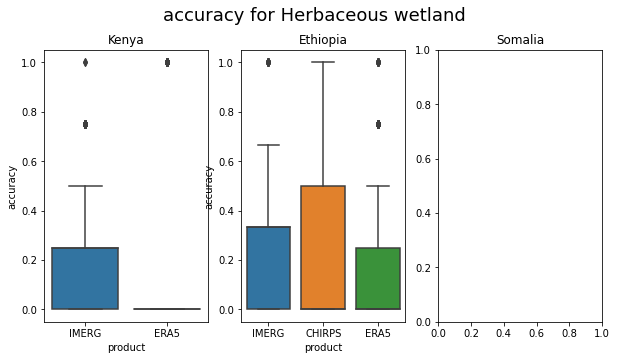

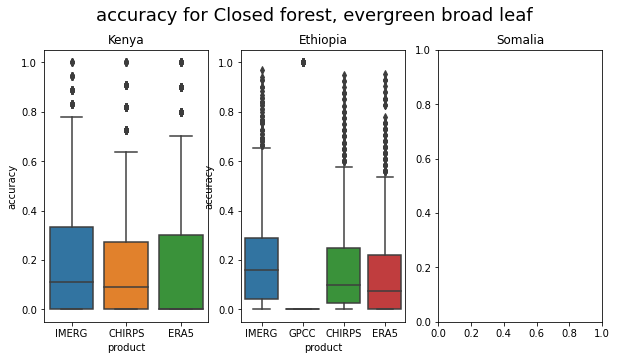

In [137]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=0.8)
plt.subplots_adjust(hspace=0.5)

countries = ['Kenya','Ethiopia','Somalia']
for i, soil in enumerate(data["description"].unique()):
    for metric in ['accuracy']:
        fig, axes = plt.subplots(1, 3, figsize=(10,5))
        for country, ax in zip(countries, axes.ravel()):
            plt.suptitle(f"{metric} for {soil}", fontsize=18, y=1)

            new_df = sub_df.loc[(data["country"]==country) & (data["description"]==soil)].dropna(subset=[metric])
            if len(new_df)>0:
                sns.boxplot(data = new_df, y=metric, x='product', ax=ax)
            ax.set_title(f"{country}")
        plt.show()